# UBER

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [3]:
dataset= pd.read_csv('Uber Request Data.csv')

In [4]:
dataset

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
dataset.rename(columns={'Request id':'Request_id','Pickup point':'Pickup_point','Driver id':'Driver_id','Request timestamp':'Request_timestamp','Drop timestamp':'Drop_timestamp'},inplace=True)

In [6]:
dataset

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [7]:
dataset. Pickup_point.unique()

array(['Airport', 'City'], dtype=object)

In [8]:
dataset['Pickup_point'] = dataset['Pickup_point'].map({'Airport':0, 'City':1})

In [9]:
dataset.Status.unique()

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [10]:
dataset['Status'] = dataset['Status'].map({'Trip Completed':0, 'Cancelled':1,'No Cars Available':2})

In [11]:
dataset

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,0,1.0,0,11/7/2016 11:51,11/7/2016 13:00
1,867,0,1.0,0,11/7/2016 17:57,11/7/2016 18:47
2,1807,1,1.0,0,12/7/2016 9:17,12/7/2016 9:58
3,2532,0,1.0,0,12/7/2016 21:08,12/7/2016 22:03
4,3112,1,1.0,0,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,1,NaN,2,15-07-2016 23:49:03,NaN
6741,6752,0,NaN,2,15-07-2016 23:50:05,NaN
6742,6751,1,NaN,2,15-07-2016 23:52:06,NaN
6743,6754,1,NaN,2,15-07-2016 23:54:39,NaN


# TIME

In [12]:
dataset['Request_timestamp'] = pd.to_datetime(dataset['Request_timestamp'])
dataset['Drop_timestamp'] = pd.to_datetime(dataset['Drop_timestamp'])

In [13]:
dataset['Drop_timestamp']

0      2016-11-07 13:00:00
1      2016-11-07 18:47:00
2      2016-12-07 09:58:00
3      2016-12-07 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop_timestamp, Length: 6745, dtype: datetime64[ns]

In [14]:
dataset['Request_timestamp']

0      2016-11-07 11:51:00
1      2016-11-07 17:57:00
2      2016-12-07 09:17:00
3      2016-12-07 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request_timestamp, Length: 6745, dtype: datetime64[ns]

In [15]:
dataset['Request_timestamp']=pd.to_datetime(dataset['Request_timestamp'],format='%d/%m/%Y %H:%M:%S.%f')
dataset['Drop_timestamp']=pd.to_datetime(dataset['Drop_timestamp'],format= '%d/%m/%Y %H:%M:%S.%f' )


In [16]:
dataset.loc[0,'Drop_timestamp'].day_name()

'Monday'

In [17]:
dataset.loc[0,'Request_timestamp'].day_name()

'Monday'

In [18]:
dataset['Request_timestamp']=dataset['Request_timestamp'].dt.day_name()
dataset['Drop_timestamp']=dataset['Drop_timestamp'].dt.day_name()

In [19]:
dataset['Drop_timestamp']

0          Monday
1          Monday
2       Wednesday
3       Wednesday
4       Wednesday
          ...    
6740          NaN
6741          NaN
6742          NaN
6743          NaN
6744          NaN
Name: Drop_timestamp, Length: 6745, dtype: object

In [20]:
dataset['Drop_timestamp'] = dataset['Drop_timestamp'].map({'Friday':0, 'Saturday':1,'Tuesday':4,'Wednesday':5,'Thursday':6})
dataset['Request_timestamp'] = dataset['Request_timestamp'].map({'Friday':0,'Monday':3,'Wednesday':5,'Thursday':6})

In [21]:
dataset.Request_timestamp.unique()

array([3, 5, 6, 0], dtype=int64)

In [22]:
dataset=dataset.fillna(0)

In [23]:
nulls = dataset.isnull().sum() 
nulls

Request_id           0
Pickup_point         0
Driver_id            0
Status               0
Request_timestamp    0
Drop_timestamp       0
dtype: int64

In [24]:
dataset

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,0,1.0,0,3,0.0
1,867,0,1.0,0,3,0.0
2,1807,1,1.0,0,5,5.0
3,2532,0,1.0,0,5,5.0
4,3112,1,1.0,0,5,5.0
...,...,...,...,...,...,...
6740,6745,1,0.0,2,0,0.0
6741,6752,0,0.0,2,0,0.0
6742,6751,1,0.0,2,0,0.0
6743,6754,1,0.0,2,0,0.0


In [25]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if '' in x:
        if len(x) > 1:
            return float(x.replace('', '')) * 1.0
        return 1.0



dataset['Driver_id'] = dataset['Driver_id'].apply(value_to_float)

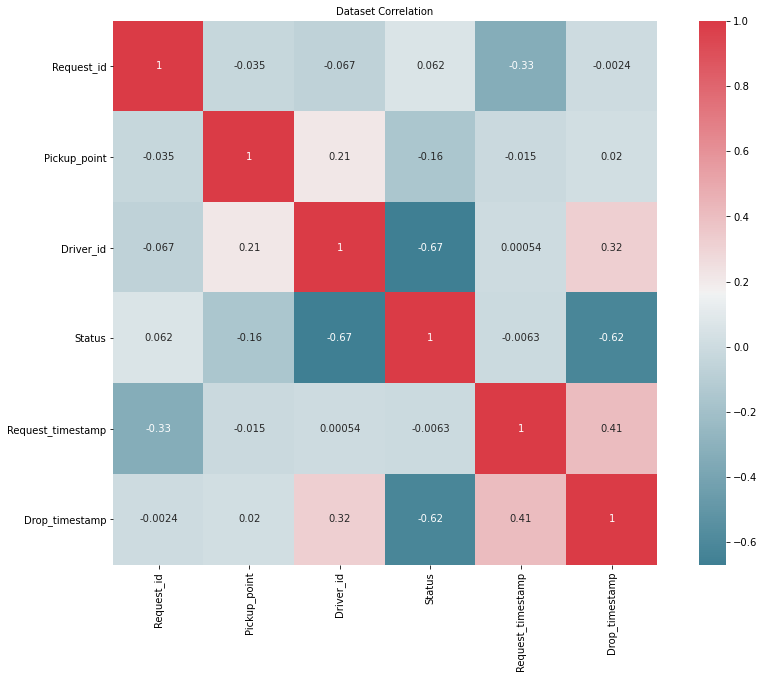

In [26]:
def heat_map_plot(dataset):
    f, ax = plt.subplots(figsize=(15, 10))
    corr = dataset.corr()
    mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),\
                     cmap=sns.diverging_palette(220, 10, as_cmap=True),
                     square=True, ax=ax, annot = True)
    mp.set_title(label='Dataset Correlation', fontsize=10)

heat_map_plot(dataset)

# Model

In [27]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values

In [28]:
X

array([[6.190e+02, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00],
       [8.670e+02, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00],
       [1.807e+03, 1.000e+00, 1.000e+00, 0.000e+00, 5.000e+00],
       ...,
       [6.751e+03, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00],
       [6.754e+03, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00],
       [6.753e+03, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [30]:
X_train = dataset.drop(columns=['Request_timestamp'])
y_train = dataset['Request_timestamp']

X_val = dataset.drop(columns=['Request_timestamp'])
y_val = dataset['Request_timestamp']

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

pipe = Pipeline([('scaler', StandardScaler()), 
                 ("Regressor",DecisionTreeRegressor(max_depth=15, random_state=0))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Regressor',
                 DecisionTreeRegressor(max_depth=15, random_state=0))])

In [32]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
print("The accuracy of the classifier on the dataset is ", (regressor.score(X_val, y_val)))

The accuracy of the classifier on the dataset is  1.0


In [34]:
print("The accuracy of the classifier on the dataset is ", (pipe.score(X_val, y_val)))

The accuracy of the classifier on the dataset is  1.0


In [35]:
y_pred=regressor.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
accuracy= confusion_matrix(y_test,y_pred)

In [37]:
accuracy

array([[349,   0,   0,   0],
       [  0, 360,   0,   0],
       [  0,   0, 645,   0],
       [  0,   0,   0, 333]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)

In [39]:
ac

1.0